In [6]:
# IMPORTS
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [7]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\COM-A\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\COM-A\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\COM-A\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\COM-A\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\COM-A\AppData\Roaming\nltk_data...
[

True

In [8]:
# ARTICLES
articles = ["""The Philippines has signed an international declaration, joining 94 other countries in calling for an effetive treaty to end global plastic pollution. The joint declaration also known as the “Nice Call for an Ambitious Treaty on Plastic Pollution" was launched on the second day of the United Nations Ocean Conference (UNOC) in Nice, France on June 10. Through this document, the Philippines and the rest of the signatories sought a “global target” to reduce the production and consumption of primary plastic polymers. It also calls for a legally-binding obligation to phase out the most problematic plastic products and chemicals of concern and the improvement of plastic product designs for minimal environmental impact. French officials described this declaration as a major diplomatic milestone less than two months before a crucial negotiating session on the plastics treaty commences. “I am delighted to see so many countries reaffirming the need for an ambitious treaty to put an end to plastic pollution. This is a strong signal that we are collectively sending to the rest of the world, just a few weeks before the negotiations resume in Geneva,” Agnès Pannier-Runacher, French Minister for Ecological Transition, Biodiversity, Forestry, Sea and Fisheries, said. “Without ambiguity, and as more than a hundred countries had already hammered home in Busan last December, we reiterate the urgent need to act, by acting at the source of the problem, to reduce our production and consumption of plastics, and by proposing concrete solutions to do so.”""",
            """The Climate Change Commission (CCC) has called on State Universities and Colleges (SUCs) to take a central role in implementing and localizing the National Adaptation Plan (NAP), referring to them as the backbone of climate resilience. At the Knowledge Exchange Forum on Tuesday in Quezon City, CCC Vice Chairperson and Executive Director Robert Borje said local government units (LGUs) and residents trust SUCs, and the partnership between them should be strengthened. “We cannot and must not close our eyes to the important role of State Universities and Colleges. And I'll be very frank, the reason why we want this is because we know that you play a key role in not just localizing the NAP, but the bigger vision is that our State Universities and Colleges play the key role of really strengthening the resilience of our communities,” he said. “We have utmost respect for State Universities and Colleges officials because kayo po ang pinagkakatiwalaan ng ating mga LGUs. At bukod pa dun (our LGUs trust you. And aside from that), it is critical and important that you play a role because in the greater scheme of things, as what I've said earlier, you're a strategic partner." Borje outlined five key priorities for SUC, including strengthening climate data systems, deepening SUC-LGU partnerships, applying futures thinking, scaling proven climate solutions, and improving access to climate finance. Borje added SUCs could also help scale proven solutions like nature-based interventions, climate-smart agriculture, and resilient infrastructure, and ensure access to climate finance through technically sound proposals. Meanwhile, Senator Loren Legarda, principal author of the Climate Change Act, also called for urgent, inclusive climate action with SUCs, highlighting the Philippines as the world’s most disaster-prone country and citing this year’s 23 typhoons. She also warned that climate change could slash gross domestic product by 13.6 percent by 2040 if adaptation measures are delayed. With this, Legarda challenged SUCs and higher education institutions to take leadership roles. “Mainstream climate education across all disciplines —not as an elective, but as a core competency for every graduate. Establish Climate Innovation Hubs in every region. Lead by example —ensure that every campus activity, event, and operation is net zero, single-use plastic-free, and sustainability-driven. Serve as climate data and analytics centers for your regions,” she said. Commission on Higher Education (CHED) Chairperson Shirley Agrupis, meanwhile, underscored the importance of translating climate knowledge into action. She also concurred with Legarda that knowledge of climate change should not be confined to the classroom. “I would like to emphasize that climate change really is an unpredictable disaster in our midst,” she said.“In all aspects of our life, climate change plays a very crucial effect on our daily living, and the state universities and colleges play a very vital role." During the forum, the CCC, CHED, the Philippine Association of State Universities and Colleges, and the Union of Local Authorities of the Philippines signed a commitment to action to advance climate education, research, and LGU collaboration. CCC Commissioner Rachel Herrera, meanwhile, said SUCs are the translators of climate science for communities. She underscored the need to affirm the transformative role of academic institutions, adding that if people invest trust in climate resilient development, the returns will be measured not only in reports and in indicators, but in lives and livelihoods protected. “You are more than educators. You are climate stewards, resilience builders, and future shapers. Let us move from knowledge to action. From planning to practice. From vulnerability to resilience,” Herrera told SUC officials.""",
            """Over the course of the year, air pollution has become particularly problematic in the Philippines. Going by World Health Organization’s (WHO) health and environment scorecard, the country records an annual mean of 24 micrograms per cubic metre (µg/m³) for fine particulate matter, significantly surpassing the recommended maximum level of 5 µg/m³. For the most part, air pollution in the Philippines stems from the burning of fossil fuels like coal and oil. Considering that 53% of the population is without access to clean fuels and technology for cooking, this is bound to further exacerbate air quality in the long run. Air pollution in the Philippines is also caused by vehicular emissions, particularly in areas like Metro Manila. In 2022, other recorded surges in air pollution outside Metro Manila include the San Fernando City Station in Pampanga, Antipolo City Station, Biñan City Station, Puerto Princesa City Station, and the Davao City Station. According to William Cuñado, Environmental Management Bureau Director at the Department of Environment and Natural Resources (DENR), lifting Covid-19 restrictions particularly deteriorated air quality in Metro Manila. For the most part, this was due to an acute surge in the number of vehicles on the street, which had fallen to 10\% \in the country’s National Capital Region during the lockdown period. Another factor was the prevalent use of firecrackers during new year celebrations. Given that the particulate matter (PM10) in firecrackers contains a mixture of carbon, sulfur, and other fine particles that pose a danger to public health, the DENR affirmed its commitment to controlling air pollution spikes of this nature. However, for this approach to be successful, it would require local government units to enforce the available Executive Order 28 on the controlled use of firecrackers.  On another note, although the government introduced the Clean Air Act of 1999, groups like Greenpeace Philippines and the Center for Research on Energy and Clean Air (CREA) point out its outdated nature in the international community. For this reason, there have been pressing calls for the government to update its standards to meet the reality of air pollution in the country. """,
            """Among the environmental issues in the Philippines is also plastic pollution, a particularly severe problem for the country. Evident by the World Bank’s use of the word ‘staggering’ to describe the situation in the Philippines, an insufficient waste management system, coupled with a high dependence on single-use plastics set the scene for the country’s annual generation of 2.7 million tons of plastic waste.   Much like any rapidly developing country, the Philippines faces unsustainable plastic consumption due to an inefficient recycling system. Estimates show that the country loses around US$890 million to unrecycled plastic products. However, despite the considerable scale of plastic pollution in the Philippines, residents of the country and some companies have been at the forefront of recycling efforts so far. For instance, companies like Infinity Eight Trading and Marketing Corporation buy plastic waste from scrap dealers, turn them into pellets, and resell them as raw materials to remake food cartons and bottles. While critics trace the Philippines’ plastic pollution problem to the poor enforcement of laws, the government, nonetheless, introduced its Extended Producer Responsibility Act (EPRA) in 2022. With this new law in play, companies are mandated to create EPR programs for plastic waste reduction, recovery, and diversion. Accordingly, by 2028, companies are expected to have achieved an 80% offset or recovery of their plastic product footprint. """
            ]

<>:4: SyntaxWarning: invalid escape sequence '\%'
<>:4: SyntaxWarning: invalid escape sequence '\%'
C:\Users\COM-A\AppData\Local\Temp\ipykernel_7612\1879787853.py:4: SyntaxWarning: invalid escape sequence '\%'
  """Over the course of the year, air pollution has become particularly problematic in the Philippines. Going by World Health Organization’s (WHO) health and environment scorecard, the country records an annual mean of 24 micrograms per cubic metre (µg/m³) for fine particulate matter, significantly surpassing the recommended maximum level of 5 µg/m³. For the most part, air pollution in the Philippines stems from the burning of fossil fuels like coal and oil. Considering that 53% of the population is without access to clean fuels and technology for cooking, this is bound to further exacerbate air quality in the long run. Air pollution in the Philippines is also caused by vehicular emissions, particularly in areas like Metro Manila. In 2022, other recorded surges in air pollution o

In [9]:
# DECLARATION OF LIBRARY 
stop_words = set(stopwords.words('English'))
punctuations = set(string.punctuation)
punctuations.add('“')
punctuations.add('’')
punctuations.add('“')
punctuations.add('\'')
punctuations.add('‘')
analyzer = SentimentIntensityAnalyzer()

In [16]:
print(punctuations)

{'!', '\\', '/', '{', '<', '$', ']', '%', '*', ':', '#', '’', '^', "'", ';', '+', '~', '[', '"', '(', '-', '&', ')', '.', '‘', '>', '|', '“', '}', ',', '=', '@', '`', '?', '_'}


In [10]:
# TOKENIZE WORDS
token_article = []
for article in articles:
    token = word_tokenize(article)
    token_article.append(token)

In [11]:
# FILTERING WORDS
filtered_tokens = []

for article in token_article:
    filtered = []
    for word in article:
        word_lower = word.lower()
        if word_lower not in stop_words and word not in punctuations:
            filtered.append(word)
    filtered_tokens.append(filtered)

print(filtered_tokens)

[['Philippines', 'signed', 'international', 'declaration', 'joining', '94', 'countries', 'calling', 'effetive', 'treaty', 'end', 'global', 'plastic', 'pollution', 'joint', 'declaration', 'also', 'known', 'Nice', 'Call', 'Ambitious', 'Treaty', 'Plastic', 'Pollution', "''", 'launched', 'second', 'day', 'United', 'Nations', 'Ocean', 'Conference', 'UNOC', 'Nice', 'France', 'June', '10', 'document', 'Philippines', 'rest', 'signatories', 'sought', 'global', 'target', '”', 'reduce', 'production', 'consumption', 'primary', 'plastic', 'polymers', 'also', 'calls', 'legally-binding', 'obligation', 'phase', 'problematic', 'plastic', 'products', 'chemicals', 'concern', 'improvement', 'plastic', 'product', 'designs', 'minimal', 'environmental', 'impact', 'French', 'officials', 'described', 'declaration', 'major', 'diplomatic', 'milestone', 'less', 'two', 'months', 'crucial', 'negotiating', 'session', 'plastics', 'treaty', 'commences', 'delighted', 'see', 'many', 'countries', 'reaffirming', 'need', '

In [12]:
# CLEANED TEXT
for filtered in filtered_tokens:    
    cleaned_text = " ".join(filtered)
    print(cleaned_text)

Philippines signed international declaration joining 94 countries calling effetive treaty end global plastic pollution joint declaration also known Nice Call Ambitious Treaty Plastic Pollution '' launched second day United Nations Ocean Conference UNOC Nice France June 10 document Philippines rest signatories sought global target ” reduce production consumption primary plastic polymers also calls legally-binding obligation phase problematic plastic products chemicals concern improvement plastic product designs minimal environmental impact French officials described declaration major diplomatic milestone less two months crucial negotiating session plastics treaty commences delighted see many countries reaffirming need ambitious treaty put end plastic pollution strong signal collectively sending rest world weeks negotiations resume Geneva ” Agnès Pannier-Runacher French Minister Ecological Transition Biodiversity Forestry Sea Fisheries said Without ambiguity hundred countries already ham

In [13]:
# SENTIMENT ANALYZER
for article in filtered_tokens:
    a = " ".join(article)
    score = analyzer.polarity_scores(a)
    print("Score:", score, "Text:", a)

Score: {'neg': 0.035, 'neu': 0.785, 'pos': 0.18, 'compound': 0.9666} Text: Philippines signed international declaration joining 94 countries calling effetive treaty end global plastic pollution joint declaration also known Nice Call Ambitious Treaty Plastic Pollution '' launched second day United Nations Ocean Conference UNOC Nice France June 10 document Philippines rest signatories sought global target ” reduce production consumption primary plastic polymers also calls legally-binding obligation phase problematic plastic products chemicals concern improvement plastic product designs minimal environmental impact French officials described declaration major diplomatic milestone less two months crucial negotiating session plastics treaty commences delighted see many countries reaffirming need ambitious treaty put end plastic pollution strong signal collectively sending rest world weeks negotiations resume Geneva ” Agnès Pannier-Runacher French Minister Ecological Transition Biodiversity 

In [14]:
# PLACE ANALYZER
nlp = spacy.load("en_core_web_sm")
doc = []
for a in filtered_tokens:
    article = " ".join(a)
    docu = nlp(article)
    doc.append(docu)
    for ent in docu.ents:
        if ent.label_ in ["GPE", "LOC"]:
            print(f"Location found: {ent.text} (Type: {ent.label_})")


Location found: Philippines (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: Geneva (Type: GPE)
Location found: Busan (Type: GPE)
Location found: Quezon City (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: Legarda (Type: GPE)
Location found: Legarda (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: San Fernando City (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: US (Type: GPE)
Location found: Philippines (Type: GPE)
Location found: Philippines (Type: GPE)


Philippines signed international declaration joining 94 countries calling effetive treaty end global plastic pollution joint declaration also known Nice Call Ambitious Treaty Plastic Pollution '' launched second day United Nations Ocean Conference UNOC Nice France June 10 document Philippines rest signatories sought global target ” reduce production consumption primary plastic polymers also calls legally-binding obligation phase problematic plastic products chemicals concern improvement plastic product designs minimal environmental impact French officials described declaration major diplomatic milestone less two months crucial negotiating session plastics treaty commences delighted see many countries reaffirming need ambitious treaty put end plastic pollution strong signal collectively sending rest world weeks negotiations resume Geneva ” Agnès Pannier-Runacher French Minister Ecological Transition Biodiversity Forestry Sea Fisheries said Without ambiguity hundred countries already ham

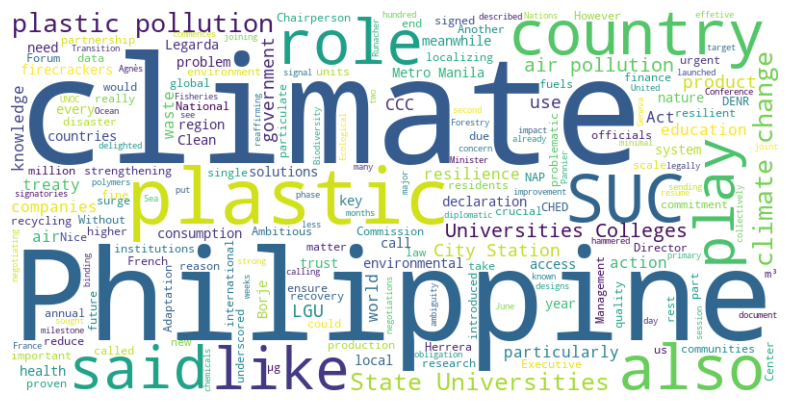

In [15]:
# WORD CLOUDS
text_data = ""
for text in filtered_tokens:
    text_data += " ".join(text)
print(text_data)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()